In [18]:
import pandas as pd
import re
import numpy as np
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter
from random import choice

In [19]:
# Storing the training and test datasets into their respective dataframes
trained = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
#Training Data
train_unique = (list(set(trained['Comment'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
train_unique_words = len(train_unique)

#Test Data
test_unique = (list(set(test['Comment'].str.findall("\w+").sum()))) # Finding all the unique words in test data's Tweet column
test_unique_words = len(test_unique)

print("Unique words in Training Data: {}".format(train_unique_words))
print("Unique words in Test Data: {}".format(test_unique_words))

Unique words in Training Data: 152
Unique words in Test Data: 72


In [21]:
#Training Data
train_matrix = [] # Forming a 2D matrix to store all training feature vectors

#Test Data
test_matrix = [] # Forming a 2D matrix to store all test feature vectors

In [22]:
#Training Data: Extracting features and storing them into the training feature matrix
for sentence in trained['Comment']:
    train_featurevec = []
    word = sentence.split()
    for w in train_unique:
        train_featurevec.append(word.count(w))
    train_matrix.append(train_featurevec)

#Test Data: Extracting features and storing them into the test feature matrix
for sentence in test['Comment']:
    test_featurevec = []
    word = sentence.split()
    for w in train_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)

In [23]:
print("Shape of Training Matrix: ({0} , {1})".format(len(train_matrix),len(train_matrix[0])))
print("Shape of Test Matrix: ({0} , {1})".format(len(test_matrix),len(test_matrix[0])))

Shape of Training Matrix: (36 , 152)
Shape of Test Matrix: (19 , 152)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
#Initializing lists to be used in plotting later.
acc_list = []
rec_list = []
prec_list = []
f1_list = []

In [26]:
def classifying(trainfeatures,testfeatures):

  X_train = trainfeatures #train_matrix - 2D feature vector
  X_test = testfeatures #test_matrix - 2D feature vector
  y_train = trained.iloc[:,0].values #trained['Sentiment]
  y_test = test.iloc[:,0].values #test['Sentiment]

  for k in [1,3,5,7,10]:

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

    accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(y_test, predicted_label)
    class_report = classification_report(y_test, predicted_label)

    macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)
    
    macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)
    print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
    print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
    print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
    print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))

In [27]:
classifying(train_matrix,test_matrix)



Confusion Matrix for k = 1 is:

[[ 7  0]
 [11  1]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

     neutral       0.39      1.00      0.56         7
    positive       1.00      0.08      0.15        12

    accuracy                           0.42        19
   macro avg       0.69      0.54      0.36        19
weighted avg       0.77      0.42      0.30        19

Accuracy Score for k = 1 is: 42.0%
Macroaveraged Recall for k = 1 is: 54.0%
Macroaveraged Precision for k = 1 is: 69.0%
Macroaveraged F1-score for k = 1 is: 36.0%


C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\q



Confusion Matrix for k = 3 is:

[[ 7  0]
 [12  0]]

Classification Report for k = 3 is:

              precision    recall  f1-score   support

     neutral       0.37      1.00      0.54         7
    positive       0.00      0.00      0.00        12

    accuracy                           0.37        19
   macro avg       0.18      0.50      0.27        19
weighted avg       0.14      0.37      0.20        19

Accuracy Score for k = 3 is: 37.0%
Macroaveraged Recall for k = 3 is: 50.0%
Macroaveraged Precision for k = 3 is: 18.0%
Macroaveraged F1-score for k = 3 is: 27.0%


Confusion Matrix for k = 5 is:

[[ 7  0]
 [12  0]]

Classification Report for k = 5 is:

              precision    recall  f1-score   support

     neutral       0.37      1.00      0.54         7
    positive       0.00      0.00      0.00        12

    accuracy                           0.37        19
   macro avg       0.18      0.50      0.27        19
weighted avg       0.14      0.37      0.20        19

A

C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\q



Confusion Matrix for k = 7 is:

[[ 7  0]
 [12  0]]

Classification Report for k = 7 is:

              precision    recall  f1-score   support

     neutral       0.37      1.00      0.54         7
    positive       0.00      0.00      0.00        12

    accuracy                           0.37        19
   macro avg       0.18      0.50      0.27        19
weighted avg       0.14      0.37      0.20        19

Accuracy Score for k = 7 is: 37.0%
Macroaveraged Recall for k = 7 is: 50.0%
Macroaveraged Precision for k = 7 is: 18.0%
Macroaveraged F1-score for k = 7 is: 27.0%


Confusion Matrix for k = 10 is:

[[ 7  0]
 [12  0]]

Classification Report for k = 10 is:

              precision    recall  f1-score   support

     neutral       0.37      1.00      0.54         7
    positive       0.00      0.00      0.00        12

    accuracy                           0.37        19
   macro avg       0.18      0.50      0.27        19
weighted avg       0.14      0.37      0.20        19


C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\qw\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arief\anaconda3\envs\q

<function matplotlib.pyplot.show(close=None, block=None)>

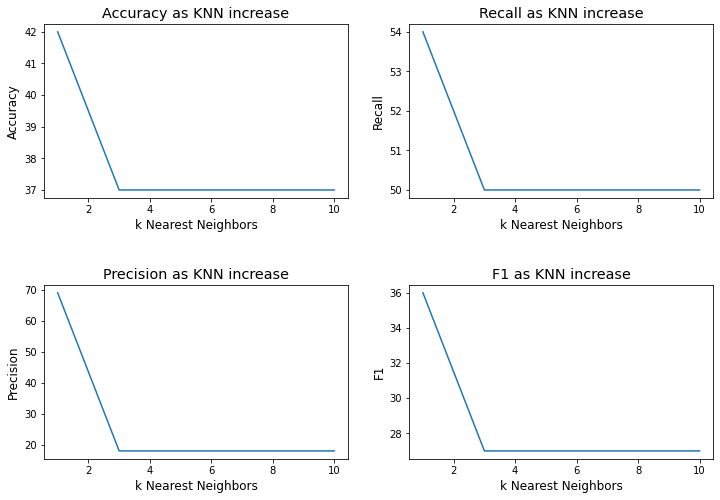

In [28]:
k_ls = [1,3,5,7,10] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show